# WeatherPy

---

## Starter Code to Generate Random Geographic Coordinates and a List of Cities

In [2]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
import scipy.stats as st 
import os
import random
from datetime import datetime

# Impor the OpenWeatherMap API key
from api_keys import weather_api_key
print(f"weather api key: {weather_api_key}")
# Import citipy to determine the cities based on latitude and longitude
from citipy import citipy

weather api key: 99d9c9c3906f8432242946870f7f1b5c


In [9]:
print(f"cwd: {os.getcwd()}")

cwd: /Users/wayne.mitchell/Documents/NU/python-api-challenge/WeatherPy


In [11]:
os.listdir()

['VacationPy.ipynb',
 'output_data',
 '__pycache__',
 'WeatherPy.ipynb',
 '.ipynb_checkpoints',
 'api_keys.py']

### Generate the Cities List by Using the `citipy` Library

In [14]:
# Empty list for holding the latitude and longitude combinations
lat_lngs = []

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)


# check for about equal number of cities in northern and southern hemisphere
# and total > 1500
lat_lngs_list = list(zip(lats, lngs))

northCount = 0
southCount = 0
for i in lat_lngs_list:
    if i[0] >= 0:
        northCount += 1
    else:
        southCount += 1
print(f"northCount: {northCount}, southCount: {southCount} total: {northCount + southCount}")

northCount: 754, southCount: 746 total: 1500


In [16]:
# create bins of latitude

# make a lat, lng dict for later recovery of lan values
# and a lat list for input to 'cut'
lat_lng_dict = {}
lat_list = []
for i in lat_lngs_list:
    lat = i[0]
    lng = i[1]
    lat_lng_dict[round(lat,3)] = round(lng,3)
    lat_list.append(round(lat,3))
    
s_75_90 = []
s_60_75 = []
s_45_60 = []
s_30_45 = []
s_15_30 = []
s_0_15  = []
n_0_15  = []
n_15_30 = []
n_30_45 = []
n_45_60 = []
n_60_75 = []
n_75_90 = []


#make latitude bins of 15 degrees
for lat in lat_list:
    if lat <= -90.0:
        s_75_90.append(lat)
        
    elif lat <= -75.0:
        s_60_75.append(lat)
        
    elif lat <= -60.0:
        s_45_60.append(lat) 
        
    elif lat <= -45.0:
        s_30_45.append(lat)
        
    elif lat <= -30.0:
        s_15_30.append(lat) 
        
    elif lat <= -15.0:
        s_0_15.append(lat)
        
    elif lat <= 15.0:
        n_0_15.append(lat)
        
    elif lat <= 30.0:
        n_15_30.append(lat)  
        
    elif lat <= 45.0:
        n_30_45.append(lat)
        
    elif lat <= 60.0:
        n_45_60.append(lat)
        
    elif lat <= 75.0:
        n_60_75.append(lat)
        
    else:
        n_75_90.append(lat)
        
latitude_bands = [s_75_90, \
                  s_60_75, \
                  s_45_60, \
                  s_30_45, \
                  s_15_30, \
                  s_0_15, \
                  n_0_15, \
                  n_15_30, \
                  n_30_45, \
                  n_45_60, \
                  n_60_75, \
                  n_75_90]
print(len(latitude_bands))
print(f"count of s_75_90: {len(s_75_90)}")
print(f"count of s_60_75: {len(s_60_75)}")
print(f"count of s_45_60: {len(s_45_60)}")
print(f"count of s_30_45: {len(s_30_45)}")
print(f"count of s_15_30: {len(s_15_30)}")
print(f"count of s_0_15: {len(s_0_15)}")
print(f"count of n_0_15: {len(n_0_15)}")
print(f"count of n_15_30: {len(n_15_30)}")
print(f"count of n_30_45: {len(n_30_45)}")
print(f"count of n_45_60: {len(n_45_60)}")
print(f"count of n_60_75: {len(n_60_75)}")
print(f"count of n_75_90: {len(n_75_90)}")

#print(latitude_bands)




12
count of s_75_90: 0
count of s_60_75: 119
count of s_45_60: 127
count of s_30_45: 147
count of s_15_30: 103
count of s_0_15: 122
count of n_0_15: 266
count of n_15_30: 128
count of n_30_45: 132
count of n_45_60: 98
count of n_60_75: 121
count of n_75_90: 137


In [18]:
# Discard extreme south, count of s_75_90: 0, nothing there, leaves 11 bands.
# collect 49 random latitudes from each list (49 X 11 = 501, so adjust to 501 from 500)

# remove first empty sublist
print(len(latitude_bands))
latitude_bands.pop(0)
print(len(latitude_bands))
latitude_bands_reduced = []
sample_size = 49
city_count = 0
loop_index = 1
cities = []
while city_count < 500:
    print(f"loop index: {loop_index}")
    loop_index += 1
    for lat_band in latitude_bands:
        #print(lat_band)
        if len(lat_band) < sample_size:
            lat_bandr = lat_band
        else:
            lat_bandr =  random.sample(lat_band, sample_size)
            #print(type(lat_bandr))
            #print(lat_band)
            #print(f"number of lats now: {len(lat_band)}")

        # trim to 49 elements
        if len(lat_bandr) > 49:
            lat_bandr = random.sample(lat_bandr, 49)
            
        latitude_bands_reduced.append(list(lat_bandr))
        
    print(f"elements  in latitude_bands_reduced: {len(latitude_bands_reduced)}")
    type(latitude_bands_reduced)
        
    # Empty list for holding the cities names
    
    for lat_band in latitude_bands_reduced:
        #print(type(lat_band))
        for lat in lat_band:
            #print(lat)
            lng = lat_lng_dict[lat]
            city = citipy.nearest_city(lat, lng).city_name
            if city not in cities:
                cities.append(city)
    city_count = len(cities)

#cities = random.sample(cities , 500)
# Print the city count to confirm sufficient count
print(f"Number of cities in the list: {len(cities)}")
print(cities)

12
11
loop index: 1
elements  in latitude_bands_reduced: 11
loop index: 2
elements  in latitude_bands_reduced: 22
loop index: 3
elements  in latitude_bands_reduced: 33
loop index: 4
elements  in latitude_bands_reduced: 44
loop index: 5
elements  in latitude_bands_reduced: 55
Number of cities in the list: 506
['edinburgh of the seven seas', 'port-aux-francais', 'ushuaia', 'bredasdorp', 'adamstown', 'puerto natales', 'port elizabeth', 'waitangi', 'grytviken', 'blackmans bay', 'punta arenas', 'hermanus', 'albany', 'port alfred', 'papatowai', 'invercargill', 'margaret river', 'east london', 'constantia', 'chonchi', 'quellon', 'stanley', 'sarmiento', 'rio grande', 'plettenberg bay', 'lebu', 'port macquarie', 'sale', 'afaahiti', 'healesville', 'constitucion', 'el trebol', 'kingston', 'santa elena', 'mar del plata', 'pozo del molle', 'ancud', 'wynyard', 'avarua', 'thames', 'tranovaho', "port saint john's", 'newnham', 'tsiombe', 'tolanaro', 'arraial do cabo', 'laguna', 'yeppoon', 'luderitz', '

In [19]:
#print("test url")
#print(f"weather_api_key: {weather_api_key}")
#url = "http://api.openweathermap.org/data/2.5/weather?"
#units = "metric"
##base_url = f"{url}appid={api_key}&units={units}&q="
#test_url = f"{url}appid={weather_api_key}&{units}&q=" + "Paris"
#print(f"this works: http://api.openweathermap.org/data/2.5/weather?appid=99d9c9c3906f8432242946870f7f1b5c&units=metric&q=Paris")
#print(f"test_url: {test_url}")
#print(requests.get(test_url))
#city_weather = requests.get(test_url).json()
#city_lat = city_weather['coord']['lat']
#city_lng = city_weather['coord']['lon']
#city_max_temp = city_weather['main']['temp_max']
#city_humidity = city_weather['main']['humidity']
#city_clouds = city_weather['clouds']['all']
#city_wind = city_weather['wind']['speed']
#city_country = city_weather['sys']['country']
#city_date = city_weather['dt']
#
#print(f"city_lat: {city_lat}")
#print(f"city_lng: {city_lng}")
#print(f"city_max_temp: {city_max_temp}")
#print(f"city_humidity: {city_humidity}")
#print(f"city_clouds: {city_clouds}")
#print(f"city_wind: {city_wind}")
#print(f"city_country: {city_country}")
#print(f"city_date: {city_date}")

In [20]:
## Requirement 1: Create Plots to Showcase the Relationship Between Weather Variables and Latitude

### Use the OpenWeatherMap API to retrieve weather data from the cities list generated in the started code

In [21]:
# Set the API base URL
print(weather_api_key)
url = "http://api.openweathermap.org/data/2.5/weather?"
units = "metric"
# Define an empty list to fetch the weather data for each city
city_data = []

# Print to logger
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters
record_count = 1
set_count = 1

# Loop through all the cities in our list to fetch weather data
for i, city in enumerate(cities):

    # Group cities in sets of 50 for logging purposes
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 0

    # Create endpoint URL with each city
    city_url = f"{url}appid={weather_api_key}&{units}&q=" + city

    # Log the url, record, and set numbers
    print("Processing Record %s of Set %s | %s" % (record_count, set_count, city))

    # Add 1 to the record count
    record_count += 1

    # Run an API request for each of the cities
    try:
        # Parse the JSON and retrieve data
        city_weather = requests.get(city_url).json()

        # Parse out latitude, longitude, max temp, humidity, cloudiness, wind speed, country, and date
        city_lat = city_weather['coord']['lat']
        city_lng = city_weather['coord']['lon']
        city_max_temp = city_weather['main']['temp_max']
        city_humidity = city_weather['main']['humidity']
        city_clouds = city_weather['clouds']['all']
        city_wind = city_weather['wind']['speed']
        city_country = city_weather['sys']['country']
        city_date = city_weather['dt']
        
        print(f"city_lat: {city_lat}")
        print(f"city_lng: {city_lng}")
        print(f"city_max_temp: {city_max_temp}")
        print(f"city_humidity: {city_humidity}")
        print(f"city_clouds: {city_clouds}")
        print(f"city_wind: {city_wind}")
        print(f"city_country: {city_country}")
        print(f"city_date: {city_date}")
        

        # Append the City information into city_data list
        city_data.append({"City": city,
                          "Lat": city_lat,
                          "Lng": city_lng,
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

    # If an error is experienced, skip the city
    except:
        print("City not found. Skipping...")
        pass

    # pause to avoid rate limiting
    time.sleep(1)

# Indicate that Data Loading is complete
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

99d9c9c3906f8432242946870f7f1b5c
Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | edinburgh of the seven seas
city_lat: -37.0676
city_lng: -12.3116
city_max_temp: 286.01
city_humidity: 76
city_clouds: 38
city_wind: 12.84
city_country: SH
city_date: 1728598298
Processing Record 2 of Set 1 | port-aux-francais
city_lat: -49.35
city_lng: 70.2167
city_max_temp: 274.83
city_humidity: 94
city_clouds: 83
city_wind: 17.55
city_country: TF
city_date: 1728598026
Processing Record 3 of Set 1 | ushuaia
city_lat: -54.8
city_lng: -68.3
city_max_temp: 278.17
city_humidity: 84
city_clouds: 99
city_wind: 1.33
city_country: AR
city_date: 1728598150
Processing Record 4 of Set 1 | bredasdorp
city_lat: -34.5322
city_lng: 20.0403
city_max_temp: 285.71
city_humidity: 82
city_clouds: 100
city_wind: 2.1
city_country: ZA
city_date: 1728598301
Processing Record 5 of Set 1 | adamstown
city_lat: -25.066
city_lng: -130.1015
city_max_temp: 294.28
city_humidity: 86
city_clouds

In [95]:
#print(city_data)
# Convert the cities weather data into a Pandas DataFrame
city_data_df = pd.DataFrame(city_data)

NameError: name 'city_data' is not defined

In [99]:
# convert max tem to degrees celsious from degrees kelvin
city_data_df["Max Temp (deg C)"] = city_data_df["Max Temp"] - 273.25

# Show Record Count
city_data_df.count()

City                484
Lat                 484
Lng                 484
Max Temp            484
Humidity            484
Cloudiness          484
Wind Speed          484
Country             481
Date                484
Max Temp (deg C)    484
dtype: int64

In [103]:
# check for nulls
city_data_null_count = city_data_df.isnull().sum()
city_data_null_count

City                0
Lat                 0
Lng                 0
Max Temp            0
Humidity            0
Cloudiness          0
Wind Speed          0
Country             3
Date                0
Max Temp (deg C)    0
dtype: int64

In [111]:
#remove all-null rows
city_data_df.dropna(how="all", inplace=True)
city_data_null_count = city_data_df.isnull().sum()
city_data_null_count

City                0
Lat                 0
Lng                 0
Max Temp            0
Humidity            0
Cloudiness          0
Wind Speed          0
Country             3
Date                0
Max Temp (deg C)    0
dtype: int64

In [113]:
#remove rows with at least one null
city_data_df.dropna(inplace=True)
city_data_null_count = city_data_df.isnull().sum()
city_data_null_count

City                0
Lat                 0
Lng                 0
Max Temp            0
Humidity            0
Cloudiness          0
Wind Speed          0
Country             0
Date                0
Max Temp (deg C)    0
dtype: int64

In [115]:
# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date,Max Temp (deg C)
City_ID,,,,,,,,,,
0,edinburgh of the seven seas,-37.0676,-12.3116,286.01,76,38,12.84,SH,1728598298,12.76
1,port-aux-francais,-49.3500,70.2167,274.83,94,83,17.55,TF,1728598026,1.58
2,ushuaia,-54.8000,-68.3000,278.17,84,99,1.33,AR,1728598150,4.92
3,bredasdorp,-34.5322,20.0403,285.71,82,100,2.10,ZA,1728598301,12.46
4,adamstown,-25.0660,-130.1015,294.28,86,100,7.72,PN,1728598302,21.03


In [117]:
print(f"max latitude: {max(city_data_df['Lat'])}")
print(f"min latitude: {min(city_data_df['Lat'])}")
print(f"cwd: {os.getcwd()}")

max latitude: 78.2186
min latitude: -54.8
cwd: /Users/wayne.mitchell/Documents/NU/python-api-challenge/WeatherPy


In [119]:
# Export the City_Data into a csv
city_data_df.to_csv("./output_data/cities.csv", index_label="City_ID")

In [121]:
# Read saved data
city_data_df = pd.read_csv("output_data/cities.csv", index_col="City_ID")

# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date,Max Temp (deg C)
City_ID,,,,,,,,,,
0,edinburgh of the seven seas,-37.0676,-12.3116,286.01,76,38,12.84,SH,1728598298,12.76
1,port-aux-francais,-49.3500,70.2167,274.83,94,83,17.55,TF,1728598026,1.58
2,ushuaia,-54.8000,-68.3000,278.17,84,99,1.33,AR,1728598150,4.92
3,bredasdorp,-34.5322,20.0403,285.71,82,100,2.10,ZA,1728598301,12.46
4,adamstown,-25.0660,-130.1015,294.28,86,100,7.72,PN,1728598302,21.03


### Create the Scatter Plots Requested

#### Latitude Vs. Temperature

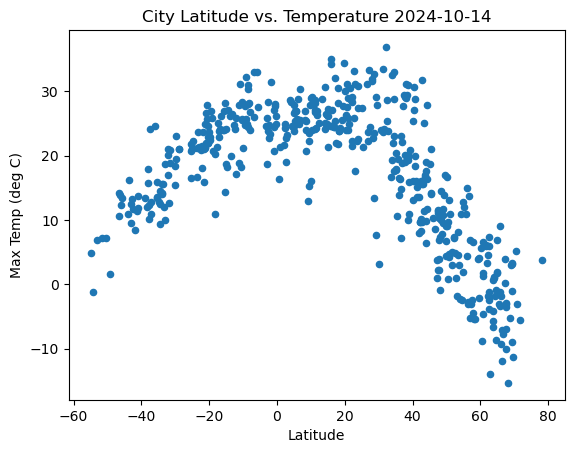

In [124]:
# Build scatter plot for latitude vs. temperature
the_plot = city_data_df.plot.scatter(x= 'Lat', y = 'Max Temp (deg C)')

# Incorporate the other graph properties
the_plot.set(xlabel="Latitude")

# get current current_yyyymmdd 
current_date = datetime.today().strftime('%Y-%m-%d')
the_plot.set(title = f"City Latitude vs. Temperature {current_date }")

# Save the figure
plt.savefig("output_data/Fig1.png")

# Show plot
plt.show()

#### Latitude Vs. Humidity

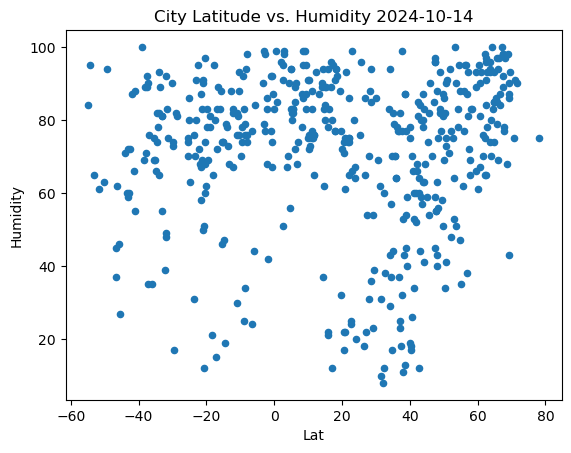

In [127]:
# Build the scatter plots for latitude vs. humidity
the_plot = city_data_df.plot.scatter(x= 'Lat', y = 'Humidity')

# Incorporate the other graph properties
the_plot.set(title = f"City Latitude vs. Humidity {current_date }")

# Save the figure
plt.savefig("output_data/Fig2.png")

# Show plot
plt.show()

#### Latitude Vs. Cloudiness

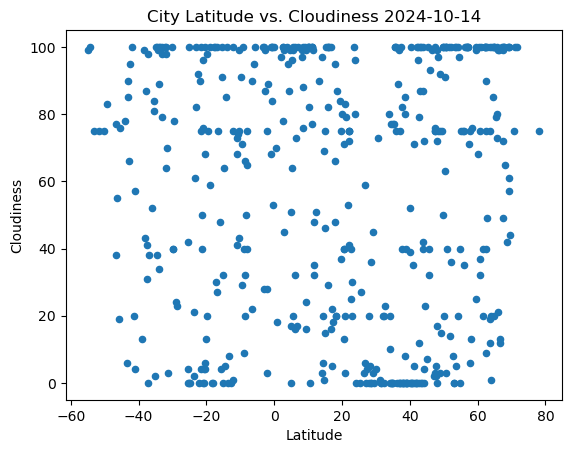

In [130]:
# Build the scatter plots for latitude vs. cloudiness
the_plot = city_data_df.plot.scatter(x= 'Lat', y = 'Cloudiness')

# Incorporate the other graph properties
the_plot.set(title = f"City Latitude vs. Cloudiness {current_date }")
the_plot.set(xlabel="Latitude")

# Save the figure
plt.savefig("output_data/Fig3.png")

# Show plot
plt.show()

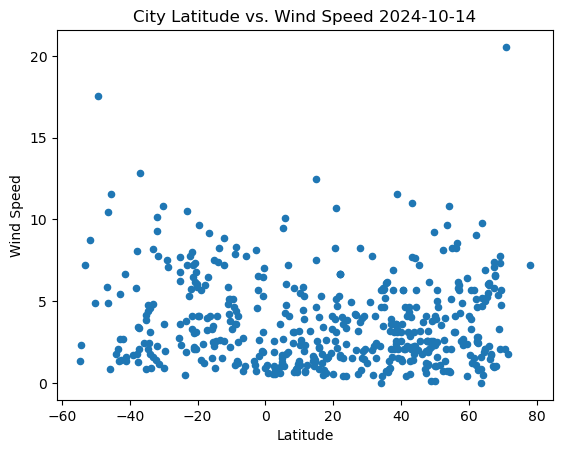

In [132]:
# Build the scatter plots for latitude vs. wind speed
the_plot = city_data_df.plot.scatter(x= 'Lat', y = 'Wind Speed')

# Incorporate the other graph properties
# Incorporate the other graph properties
the_plot.set(title = f"City Latitude vs. Wind Speed {current_date }")
the_plot.set(xlabel="Latitude")

# Save the figure
plt.savefig("output_data/Fig4.png")

# Show plot
plt.show()

#### Latitude vs. Wind Speed Plot

---

## Requirement 2: Compute Linear Regression for Each Relationship


In [136]:
# Define a function to create Linear Regression plots
def regress(x_values_series, y_values_series):
    # calculate linear regression from two series, 
    # return a dictionary, keys: slope, intercept, r_val, p_val, std_error, fit, r_squared, line_equation
    # requires from scipy.stats import linregress
    slope, intercept, r_val, p_val, std_error = st.linregress(x_values_series, y_values_series)

    fit = slope * x_values_series + intercept
    r_squared = r_val ** 2
    line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
    
    regression_results = {
        "slope": slope,
        "intercept": intercept,
        "r_val": r_val,
        "p_val": p_val, 
        "std_error": std_error,
        "fit": fit,
        "r_squared": r_squared,
        "line_equation": line_eq}
    return regression_results

In [138]:
# Create a DataFrame with the Northern Hemisphere data (Latitude >= 0)
northern_hemi_df = city_data_df.loc[city_data_df['Lat'] >= 0]
nan_count = southern_hemi_df.isnull().sum()
print(f"number of nulls: {nan_count}")
northern_hemi_df.shape

number of nulls: City                0
Lat                 0
Lng                 0
Max Temp            0
Humidity            0
Cloudiness          0
Wind Speed          0
Country             3
Date                0
Max Temp (deg C)    0
dtype: int64


(326, 10)

In [140]:
# Display sample data
northern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date,Max Temp (deg C)
City_ID,,,,,,,,,,
12,albany,42.6001,-73.9662,283.47,64,12,1.34,US,1728598123,10.22
18,constantia,44.1833,28.6500,289.65,63,72,2.02,RO,1728598318,16.40
21,stanley,54.8680,-1.6985,275.16,88,0,2.06,GB,1728598098,1.91
27,sale,34.0389,-6.8166,292.53,94,10,0.00,MA,1728598328,19.28
32,kingston,17.9970,-76.7936,303.80,77,95,1.53,JM,1728598319,30.55


In [142]:
# Create a DataFrame with the Southern Hemisphere data (Latitude < 0)
southern_hemi_df = city_data_df.loc[city_data_df['Lat'] < 0]
southern_hemi_df.shape

(155, 10)

In [144]:
# Display sample data
southern_hemi_df
nan_count = southern_hemi_df.isnull().sum()
print(f"number of nulls: {nan_count}")

number of nulls: City                0
Lat                 0
Lng                 0
Max Temp            0
Humidity            0
Cloudiness          0
Wind Speed          0
Country             0
Date                0
Max Temp (deg C)    0
dtype: int64


###  Temperature vs. Latitude Linear Regression Plot

{'slope': -0.5006910136220062, 'intercept': 34.02190236151408, 'r_val': -0.8255323675229128, 'p_val': 1.705656681899999e-82, 'std_error': 0.019015834482742123, 'fit': City_ID
12     12.692415
18     11.899721
21      6.549988
27     16.978931
32     25.010966
         ...    
479    12.577607
480    19.376690
481    13.952554
482    13.622799
483     2.742583
Name: Lat, Length: 326, dtype: float64, 'r_squared': 0.6815036898279856, 'line_equation': 'y = -0.5x + 34.02'}
The r-squared value is: 0.6815036898279856


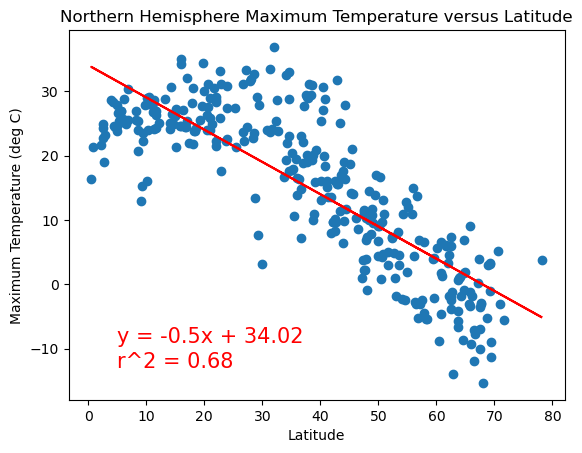

In [190]:
# Linear regression on Northern Hemisphere
regression_values = regress(northern_hemi_df["Lat"],northern_hemi_df["Max Temp (deg C)"])
print(regression_values)
slope = regression_values['slope']
intercept = regression_values['intercept'] 
r_val = regression_values['r_val']
p_val = regression_values['p_val'] 
std_error = regression_values['std_error'] 
fit = regression_values['fit'] 
r_squared = regression_values['r_squared']
r_sqr_round = round(r_squared,2)
line_equation = regression_values['line_equation'] 

print(f"The r-squared value is: {r_squared}")
latitude = northern_hemi_df["Lat"]
temp = northern_hemi_df["Max Temp (deg C)"]
plt.scatter(latitude,temp)
plt.plot(latitude,fit,"r-")

plt.annotate(line_equation,(5,-9),fontsize=15,color="red")
r2 = "r^2 = " + str(r_sqr_round)
plt.annotate(r2,(5, -13),fontsize=15,color="red")
plt.xlabel("Latitude")
plt.ylabel("Maximum Temperature (deg C)")
plt.title("Northern Hemisphere Maximum Temperature versus Latitude")
plt.show()

{'slope': 0.39034451465591435, 'intercept': 29.09841944037973, 'r_val': 0.8276056452041758, 'p_val': 3.294616148132001e-40, 'std_error': 0.021403346709456712, 'fit': City_ID
0      14.629285
1       9.834918
2       7.707540
3      15.618965
4      19.314044
         ...    
462    10.931044
463    14.281527
465    25.649023
471    28.409227
473    23.229902
Name: Lat, Length: 155, dtype: float64, 'r_squared': 0.6849311039738201, 'line_equation': 'y = 0.39x + 29.1'}
The r-squared value is: 0.6849311039738201


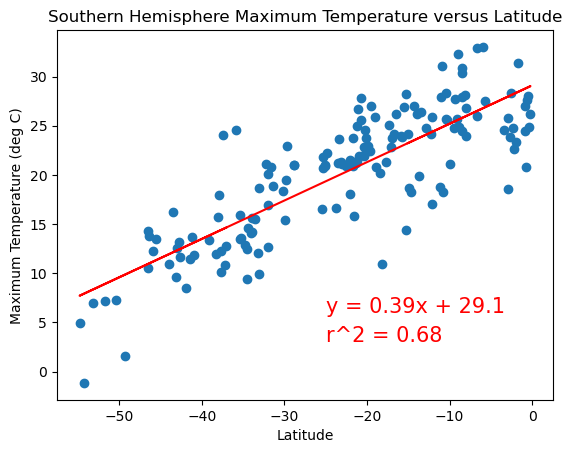

In [192]:
# Linear regression on Southern Hemisphere
regression_values = regress(southern_hemi_df["Lat"],southern_hemi_df["Max Temp (deg C)"],)
print(regression_values)
slope = regression_values['slope']
intercept = regression_values['intercept'] 
r_val = regression_values['r_val']
p_val = regression_values['p_val'] 
std_error = regression_values['std_error'] 
fit = regression_values['fit'] 
r_squared = regression_values['r_squared']
r_sqr_round = round(r_squared,2)
line_equation = regression_values['line_equation'] 

print(f"The r-squared value is: {r_squared}")
latitude = southern_hemi_df["Lat"]
temp = southern_hemi_df["Max Temp (deg C)"]
plt.scatter(latitude, temp)
plt.plot(latitude,fit,"r-")

plt.annotate(line_equation,(-25, 6),fontsize=15,color="red")
r2 = "r^2 = " + str(r_sqr_round)
plt.annotate(r2,(-25, 3),fontsize=15,color="red")
plt.xlabel("Latitude")
plt.ylabel("Maximum Temperature (deg C)")
plt.title("Southern Hemisphere Maximum Temperature versus Latitude")
plt.show()

### Discussion
Temperature shows a strong positive correlation with latitude in the southern hemisphere (r^2 = 0.68), and a strong negative correlation with latitude in the northern hemisphere (r^2 = 0.68). This is reasonable. The latitude in the southern hemisphere ranges from lat_-90 degress at the south pole (where we expect lower temperatures) to lat_0 degrees at the equator, where we excpect higher, tropical temperatures. Both latitude and temperture are increasing together in the south. Conversely, in the nothern hemisphere, the the two trends are moving in opposite directions. Latitude ranges from lat_0 degrees at the equator (higher, warmer temperatures) to lat_90 degrees at the north pole (lower and colder); the observed negative correlation reflects this patern. 

### Humidity vs. Latitude Linear Regression Plot

{'slope': 0.06919299989283742, 'intercept': 68.60806824222325, 'r_val': 0.06088602366182527, 'p_val': 0.2730261163386769, 'std_error': 0.06301813682073133, 'fit': City_ID
12     71.555697
18     71.665243
21     72.404550
27     70.963322
32     69.853335
         ...    
479    71.571563
480    70.631963
481    71.381552
482    71.427123
483    72.930714
Name: Lat, Length: 326, dtype: float64, 'r_squared': 0.003707107877348347, 'line_equation': 'y = 0.07x + 68.61'}
The r-squared value is: 0.003707107877348347


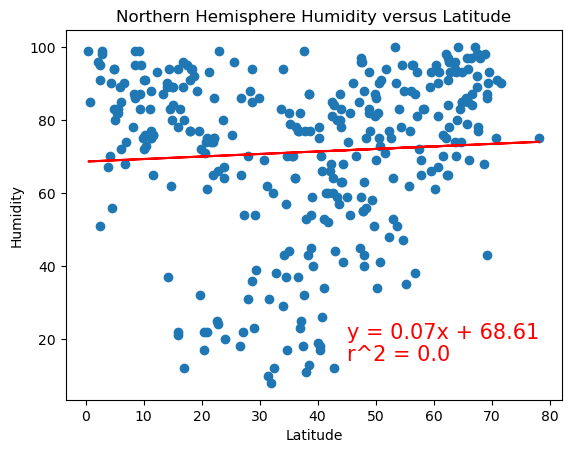

In [254]:
# Northern Hemisphere
regression_values = regress(northern_hemi_df["Lat"],northern_hemi_df["Humidity"])
print(regression_values)
slope = regression_values['slope']
intercept = regression_values['intercept'] 
r_val = regression_values['r_val']
p_val = regression_values['p_val'] 
std_error = regression_values['std_error'] 
fit = regression_values['fit'] 
r_squared = regression_values['r_squared']
r_sqr_round = round(r_squared,2)
line_equation = regression_values['line_equation'] 

print(f"The r-squared value is: {r_squared}")
latitude = northern_hemi_df["Lat"]
humidity = northern_hemi_df["Humidity"]
plt.scatter(latitude,humidity)
plt.plot(latitude,fit,"r-")

plt.annotate(line_equation,(45,20),fontsize=15,color="red")
r2 = "r^2 = " + str(r_sqr_round)
plt.annotate(r2,(45, 14),fontsize=15,color="red")
plt.xlabel("Latitude")
plt.ylabel("Humidity")
plt.title("Northern Hemisphere Humidity versus Latitude")
plt.show()

{'slope': 0.1528496051251318, 'intercept': 74.8558801943905, 'r_val': 0.1104446792921415, 'p_val': 0.17128576795919676, 'std_error': 0.11120101513108915, 'fit': City_ID
0      69.190112
1      67.312752
2      66.479722
3      69.577647
4      71.024552
         ...    
462    67.741969
463    69.053938
465    73.505179
471    74.586009
473    72.557909
Name: Lat, Length: 155, dtype: float64, 'r_squared': 0.012198027183943989, 'line_equation': 'y = 0.15x + 74.86'}
The r-squared value is: 0.012198027183943989


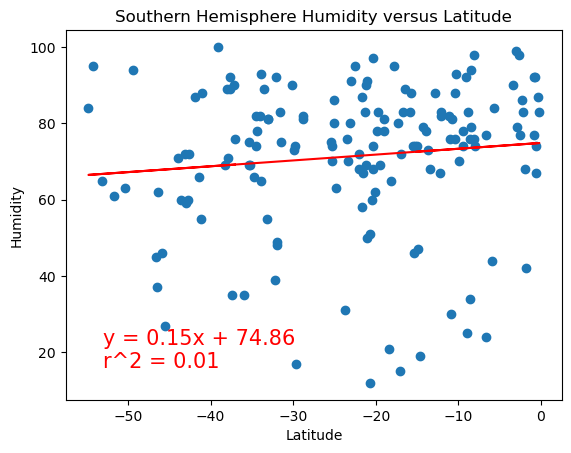

In [279]:
##### Southern Hemisphere
regression_values = regress(southern_hemi_df["Lat"],southern_hemi_df["Humidity"])
print(regression_values)
slope = regression_values['slope']
intercept = regression_values['intercept'] 
r_val = regression_values['r_val']
p_val = regression_values['p_val'] 
std_error = regression_values['std_error'] 
fit = regression_values['fit'] 
r_squared = regression_values['r_squared']
r_sqr_round = round(r_squared,2)
line_equation = regression_values['line_equation'] 

print(f"The r-squared value is: {r_squared}")
latitude = southern_hemi_df["Lat"]
humidity = southern_hemi_df["Humidity"]
plt.scatter(latitude,humidity)
plt.plot(latitude,fit,"r-")

plt.annotate(line_equation,(-53,22),fontsize=15,color="red")
r2 = "r^2 = " + str(r_sqr_round)
plt.annotate(r2,(-53,16),fontsize=15,color="red")
plt.xlabel("Latitude")
plt.ylabel("Humidity")
plt.title("Southern Hemisphere Humidity versus Latitude")
plt.show()

### Discussion. 
There is essentially no correlation between latitude and humidity in either the northern or southern hemisphere, (r^2 values of 0.0 and 0.01 respectively).

### Cloudiness vs. Latitude Linear Regression Plot

{'slope': 0.12135395364256037, 'intercept': 50.23356238344546, 'r_val': 0.06166562229428893, 'p_val': 0.2669206424755437, 'std_error': 0.10912166844806548, 'fit': City_ID
12     55.403253
18     55.595381
21     56.892011
27     54.364317
32     52.417569
         ...    
479    55.431079
480    53.783166
481    55.097829
482    55.177753
483    57.814823
Name: Lat, Length: 326, dtype: float64, 'r_squared': 0.0038026489729419037, 'line_equation': 'y = 0.12x + 50.23'}
The r-squared value is: 0.0038026489729419037


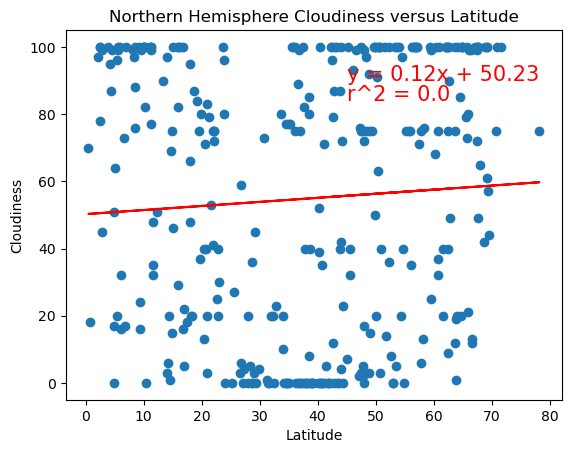

In [212]:
# Northern Hemisphere
regression_values = regress(northern_hemi_df["Lat"],northern_hemi_df["Cloudiness"])
print(regression_values)
slope = regression_values['slope']
intercept = regression_values['intercept'] 
r_val = regression_values['r_val']
p_val = regression_values['p_val'] 
std_error = regression_values['std_error'] 
fit = regression_values['fit'] 
r_squared = regression_values['r_squared']
r_sqr_round = round(r_squared,2)
line_equation = regression_values['line_equation'] 

print(f"The r-squared value is: {r_squared}")
latitude = northern_hemi_df["Lat"]
cloudiness = northern_hemi_df["Cloudiness"]
plt.scatter(latitude, cloudiness)
plt.plot(latitude,fit,"r-")

plt.annotate(line_equation,(45,90),fontsize=15,color="red")
r2 = "r^2 = " + str(r_sqr_round)
plt.annotate(r2,(45, 84),fontsize=15,color="red")
plt.xlabel("Latitude")
plt.ylabel("Cloudiness")
plt.title("Northern Hemisphere Cloudiness versus Latitude")
plt.show()

{'slope': -0.058848960835526556, 'intercept': 57.54486288950624, 'r_val': -0.022599989522073163, 'p_val': 0.7801483615366653, 'std_error': 0.21046210356164965, 'fit': City_ID
0      59.726253
1      60.449059
2      60.769786
3      59.577047
4      59.019971
         ...    
462    60.283805
463    59.778681
465    58.064899
471    57.648767
473    58.429610
Name: Lat, Length: 155, dtype: float64, 'r_squared': 0.0005107595263978168, 'line_equation': 'y = -0.06x + 57.54'}
The r-squared value is: 0.0005107595263978168


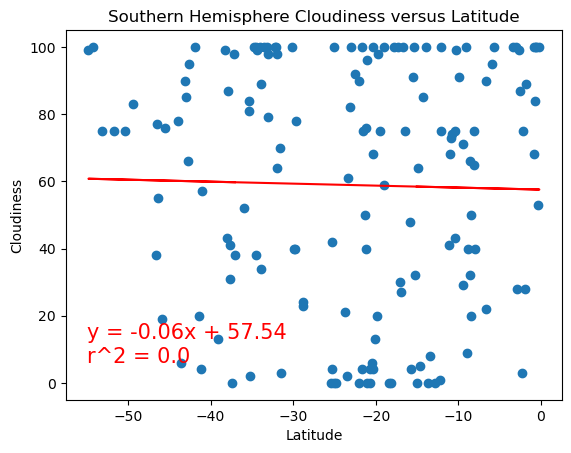

In [266]:
# Southern Hemisphere
regression_values = regress(southern_hemi_df["Lat"],southern_hemi_df["Cloudiness"])
print(regression_values)
slope = regression_values['slope']
intercept = regression_values['intercept'] 
r_val = regression_values['r_val']
p_val = regression_values['p_val'] 
std_error = regression_values['std_error'] 
fit = regression_values['fit'] 
r_squared = regression_values['r_squared']
r_sqr_round = round(r_squared,2)
line_equation = regression_values['line_equation'] 

print(f"The r-squared value is: {r_squared}")
latitude = southern_hemi_df["Lat"]
cloudiness = southern_hemi_df["Cloudiness"]
plt.scatter(latitude, cloudiness)
plt.plot(latitude,fit,"r-")

plt.annotate(line_equation,(-55,13),fontsize=15,color="red")
r2 = "r^2 = " + str(r_sqr_round)
plt.annotate(r2,(-55, 6),fontsize=15,color="red")
plt.xlabel("Latitude")
plt.ylabel("Cloudiness")
plt.title("Southern Hemisphere Cloudiness versus Latitude")
plt.show()

### Discussion 
There is essentially no correlation between latitude and cloudiness in either the northern or southern hemisphere, (r^2 values of 0.0 and 0.0).

### Wind Speed vs. Latitude Linear Regression Plot

{'slope': 0.024614237576794287, 'intercept': 2.4715345756034965, 'r_val': 0.19028132880617224, 'p_val': 0.0005522717892204336, 'std_error': 0.007055204308792613, 'fit': City_ID
12     3.520104
18     3.559073
21     3.822069
27     3.309376
32     2.914517
         ...   
479    3.525748
480    3.191501
481    3.458154
482    3.474365
483    4.009243
Name: Lat, Length: 326, dtype: float64, 'r_squared': 0.036206984092242635, 'line_equation': 'y = 0.02x + 2.47'}
The r-squared value is: 0.036206984092242635


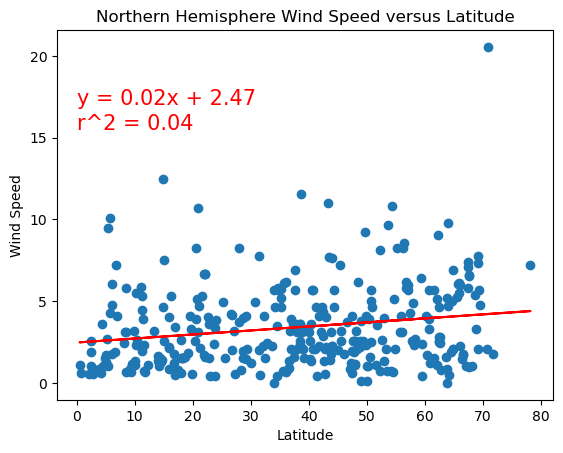

In [270]:
# Northern Hemisphere
regression_values = regress(northern_hemi_df["Lat"],northern_hemi_df["Wind Speed"])
print(regression_values)
slope = regression_values['slope']
intercept = regression_values['intercept'] 
r_val = regression_values['r_val']
p_val = regression_values['p_val'] 
std_error = regression_values['std_error'] 
fit = regression_values['fit'] 
r_squared = regression_values['r_squared']
r_sqr_round = round(r_squared,2)
line_equation = regression_values['line_equation'] 

print(f"The r-squared value is: {r_squared}")
latitude = northern_hemi_df["Lat"]
wind_speed = northern_hemi_df["Wind Speed"]
plt.scatter(latitude,wind_speed)
plt.plot(latitude,fit,"r-")

plt.annotate(line_equation,(0,17),fontsize=15,color="red")
r2 = "r^2 = " + str(r_sqr_round)
plt.annotate(r2,(0, 15.5),fontsize=15,color="red")
plt.xlabel("Latitude")
plt.ylabel("Wind Speed")
plt.title("Northern Hemisphere Wind Speed versus Latitude")
plt.show()

{'slope': -0.020845289292909196, 'intercept': 3.9429639904389546, 'r_val': -0.09951651330982611, 'p_val': 0.21794818386643253, 'std_error': 0.016850229269125747, 'fit': City_ID
0      4.715649
1      4.971679
2      5.085286
3      4.662798
4      4.465472
         ...   
462    4.913143
463    4.734220
465    4.127170
471    3.979768
473    4.256356
Name: Lat, Length: 155, dtype: float64, 'r_squared': 0.009903536421344797, 'line_equation': 'y = -0.02x + 3.94'}
The r-squared value is: 0.009903536421344797


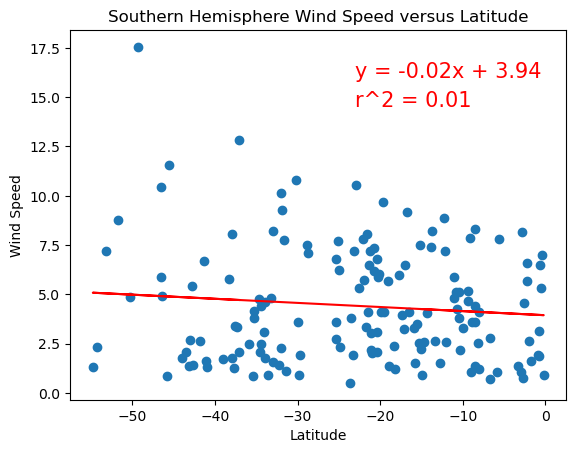

In [272]:
# Southern Hemisphere
regression_values = regress(southern_hemi_df["Lat"],southern_hemi_df["Wind Speed"])
print(regression_values)
slope = regression_values['slope']
intercept = regression_values['intercept'] 
r_val = regression_values['r_val']
p_val = regression_values['p_val'] 
std_error = regression_values['std_error'] 
fit = regression_values['fit'] 
r_squared = regression_values['r_squared']
r_sqr_round = round(r_squared,2)
line_equation = regression_values['line_equation'] 

print(f"The r-squared value is: {r_squared}")
latitude = southern_hemi_df["Lat"]
wind_speed = southern_hemi_df["Wind Speed"]
plt.scatter(latitude, wind_speed)
plt.plot(latitude,fit,"r-")

plt.annotate(line_equation,(-23,16),fontsize=15,color="red")
r2 = "r^2 = " + str(r_sqr_round)
plt.annotate(r2,(-23, 14.5),fontsize=15,color="red")
plt.xlabel("Latitude")
plt.ylabel("Wind Speed")
plt.title("Southern Hemisphere Wind Speed versus Latitude")
plt.show()

### Discussion 
There is essentially no correlation between latitude and wind speed in either the northern or southern hemisphere, (r^2 values of 0.04 and 0.01 respectively).